In [1]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_2 = pd.read_csv('../output/train_outputs.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0


In [3]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_valid.shape)


X_train.shape:  (876, 64)
X_test.shape:  (219, 64)


In [5]:
# Scaling
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 ...
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [ 2.33773395e+01  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]]


In [6]:
x_test_scaled = standardizer.transform(x_valid)
x_test_scaled


array([[-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       ...,
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [ 2.33773395e+01,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00]])

In [7]:
x_train = x_train.values.reshape(876, 64, 1)
x_valid = x_valid.values.reshape(219, 64, 1)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_valid.shape)


X_train.shape:  (876, 64, 1)
X_test.shape:  (219, 64, 1)


In [8]:
# Set up parameters
n_steps = 64
n_features = 1

# Create a traditional RNN network
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        128, input_shape=(n_steps, n_features), return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mse', metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
])


In [10]:
history_1 = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=10, batch_size=10,)


Epoch 1/10
88/88 [==============================] - 5s 56ms/step - loss: 0.4825 - accuracy: 0.7511 - precision: 0.7200 - recall: 0.2748 - val_loss: 0.3089 - val_accuracy: 0.8584 - val_precision: 0.8229 - val_recall: 1.0000
Epoch 2/10
88/88 [==============================] - 4s 45ms/step - loss: 0.1192 - accuracy: 0.9863 - precision: 0.9883 - recall: 0.9656 - val_loss: 0.3740 - val_accuracy: 0.3425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
88/88 [==============================] - 4s 45ms/step - loss: 0.0438 - accuracy: 0.9943 - precision: 1.0000 - recall: 0.9809 - val_loss: 0.0249 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
88/88 [==============================] - 4s 44ms/step - loss: 0.0185 - accuracy: 0.9989 - precision: 1.0000 - recall: 0.9962 - val_loss: 0.0131 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
88/88 [==============================] - 4s 43ms/step - loss: 0.0103 - accuracy: 0.9989 -

In [11]:
best_score = max(history_1.history['accuracy'])
print(best_score)

1.0


In [12]:
history_1.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [13]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()


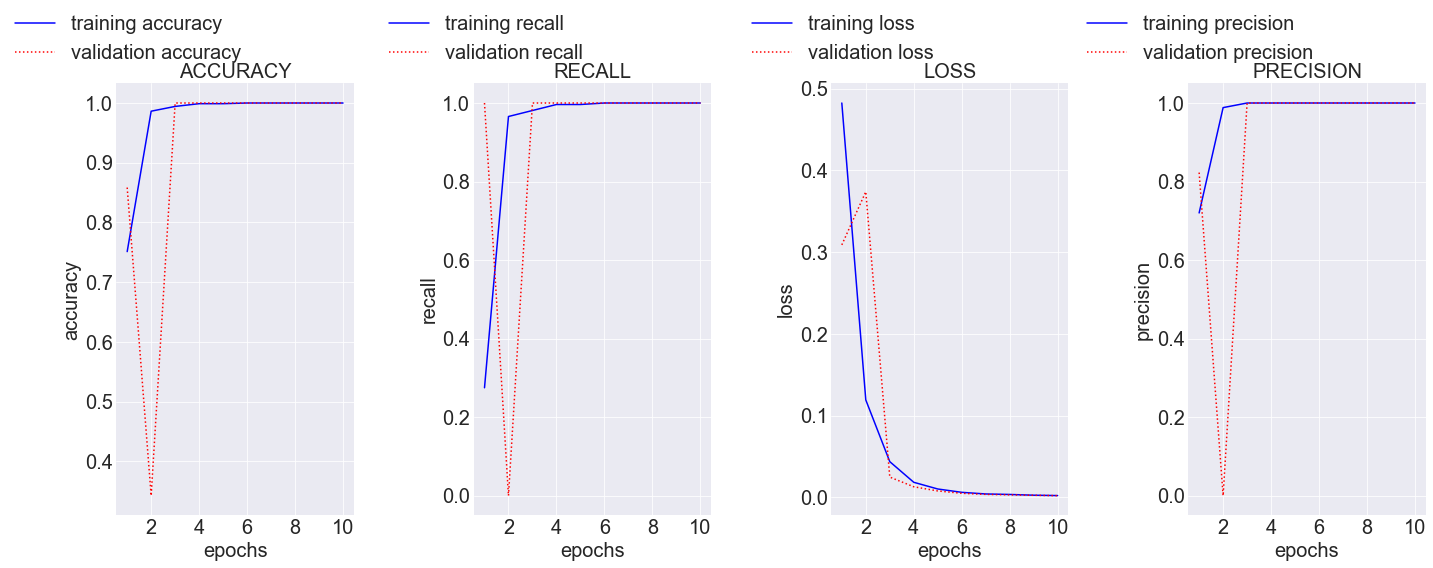

In [14]:
plot_history(history_1)


In [15]:
y_pred = model.predict(x_valid, verbose=0)
y_pred


array([[0.9768261 ],
       [0.9768305 ],
       [0.9768138 ],
       [0.9768152 ],
       [0.9768306 ],
       [0.97683185],
       [0.01923564],
       [0.01921475],
       [0.01922935],
       [0.01920527],
       [0.01922169],
       [0.01921877],
       [0.9768239 ],
       [0.97683126],
       [0.97682905],
       [0.9768306 ],
       [0.9768292 ],
       [0.9768322 ],
       [0.9768264 ],
       [0.9768256 ],
       [0.97682714],
       [0.97682697],
       [0.97682285],
       [0.97682345],
       [0.976823  ],
       [0.97682106],
       [0.97682023],
       [0.9768174 ],
       [0.9768169 ],
       [0.97681856],
       [0.9768208 ],
       [0.01923963],
       [0.01924118],
       [0.0192371 ],
       [0.01923308],
       [0.97682965],
       [0.9768223 ],
       [0.9768293 ],
       [0.97683287],
       [0.97683334],
       [0.97683203],
       [0.9768337 ],
       [0.97683   ],
       [0.9768296 ],
       [0.97682947],
       [0.9768334 ],
       [0.9768348 ],
       [0.976

In [16]:
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(n_steps, n_features), return_sequences=True),
    tf.keras.layers.SimpleRNN(64, 'relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, 'sigmoid')
])


In [17]:
gru_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   loss='mse', metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [18]:
history_2 = gru_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=10,)

Epoch 1/10
88/88 [==============================] - 3s 30ms/step - loss: 0.6634 - accuracy: 0.7671 - precision: 0.7339 - recall: 0.3473 - val_loss: 0.4242 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
88/88 [==============================] - 2s 26ms/step - loss: 0.2527 - accuracy: 0.9737 - precision: 1.0000 - recall: 0.9122 - val_loss: 0.1623 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
88/88 [==============================] - 2s 26ms/step - loss: 0.1129 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0826 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
88/88 [==============================] - 2s 26ms/step - loss: 0.0624 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0491 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
88/88 [==============================] - 2s 25ms/step - loss: 0.0380 - accuracy: 1.0000 - precisi

In [19]:
best_score = max(history_1.history['accuracy'])
print(best_score)

1.0


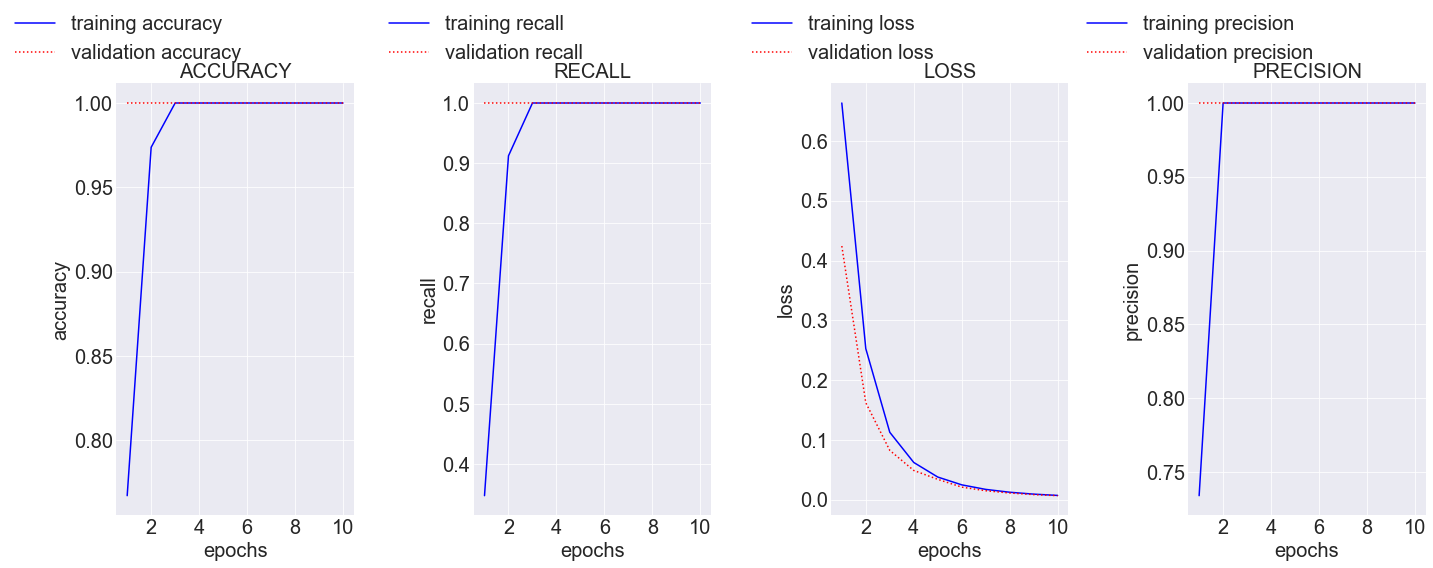

In [20]:
plot_history(history_2)

In [21]:
y_pred_2 = gru_model.predict(x_valid, verbose=0)
y_pred_2

array([[0.95977604],
       [0.9603596 ],
       [0.95863676],
       [0.9588073 ],
       [0.9604949 ],
       [0.96081096],
       [0.04851997],
       [0.04900292],
       [0.04891565],
       [0.04575506],
       [0.04914773],
       [0.04915828],
       [0.9595309 ],
       [0.96039665],
       [0.9600027 ],
       [0.9602594 ],
       [0.95997375],
       [0.9586053 ],
       [0.95977753],
       [0.9597088 ],
       [0.9598476 ],
       [0.9597287 ],
       [0.95918506],
       [0.9592936 ],
       [0.9593711 ],
       [0.9590707 ],
       [0.95904005],
       [0.9589313 ],
       [0.9589056 ],
       [0.9589868 ],
       [0.959254  ],
       [0.04843694],
       [0.04822797],
       [0.04841974],
       [0.04866424],
       [0.9600992 ],
       [0.95922107],
       [0.9601304 ],
       [0.9599612 ],
       [0.9606968 ],
       [0.9607736 ],
       [0.9605423 ],
       [0.96027064],
       [0.9601212 ],
       [0.96010995],
       [0.9604428 ],
       [0.96019983],
       [0.960

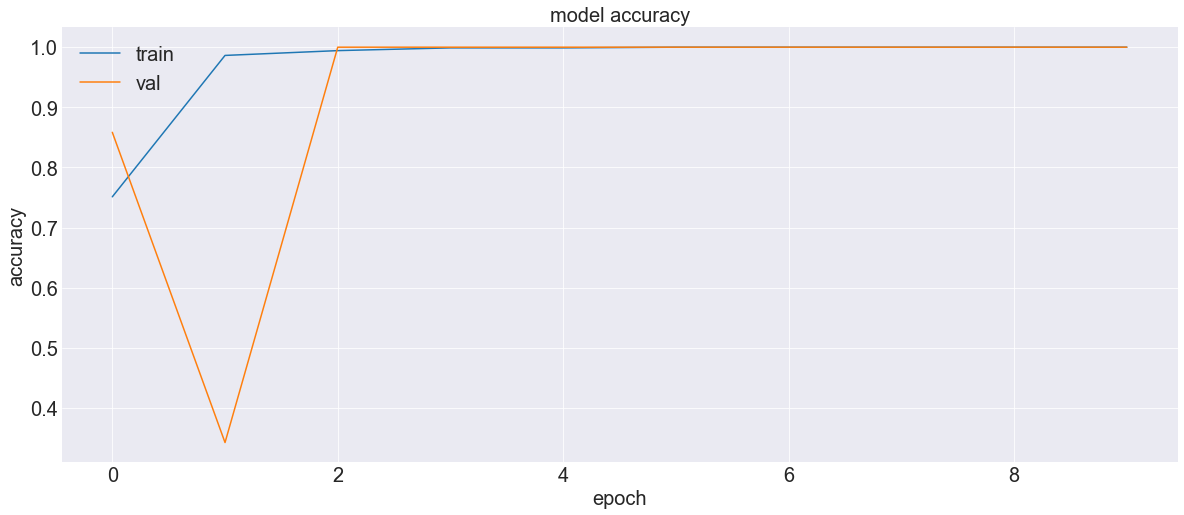

In [32]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy',  fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'val'], loc='upper left', fontsize=20)
plt.show()


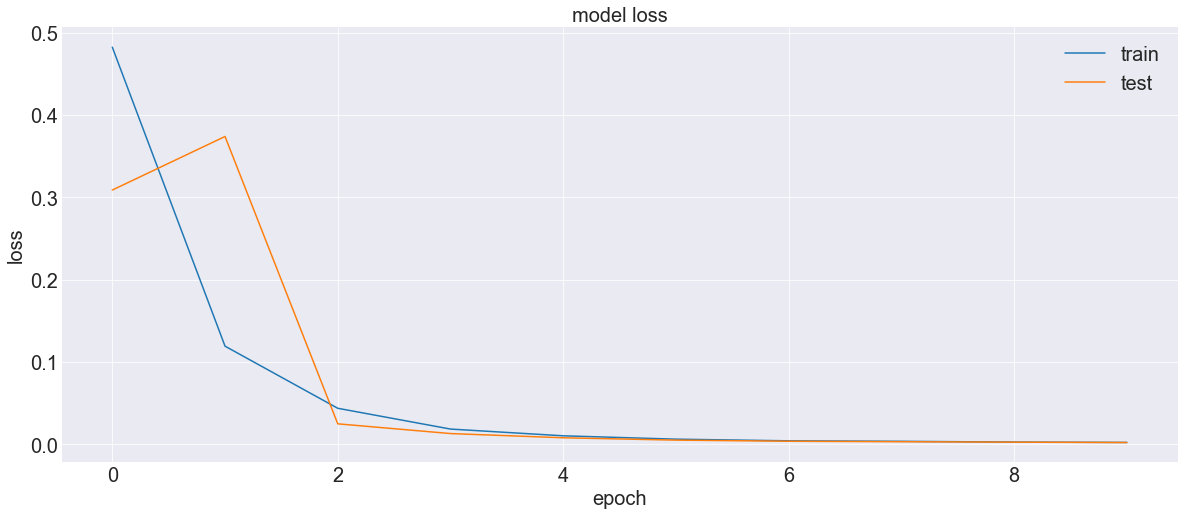

In [33]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()


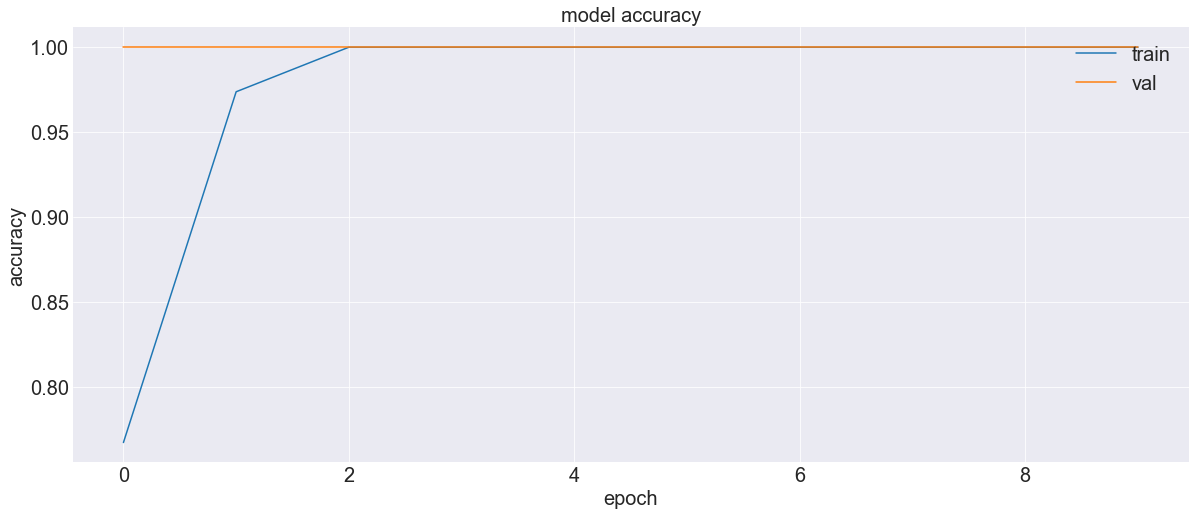

In [35]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy',  fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'val'], loc='upper right', fontsize=20)
plt.show()


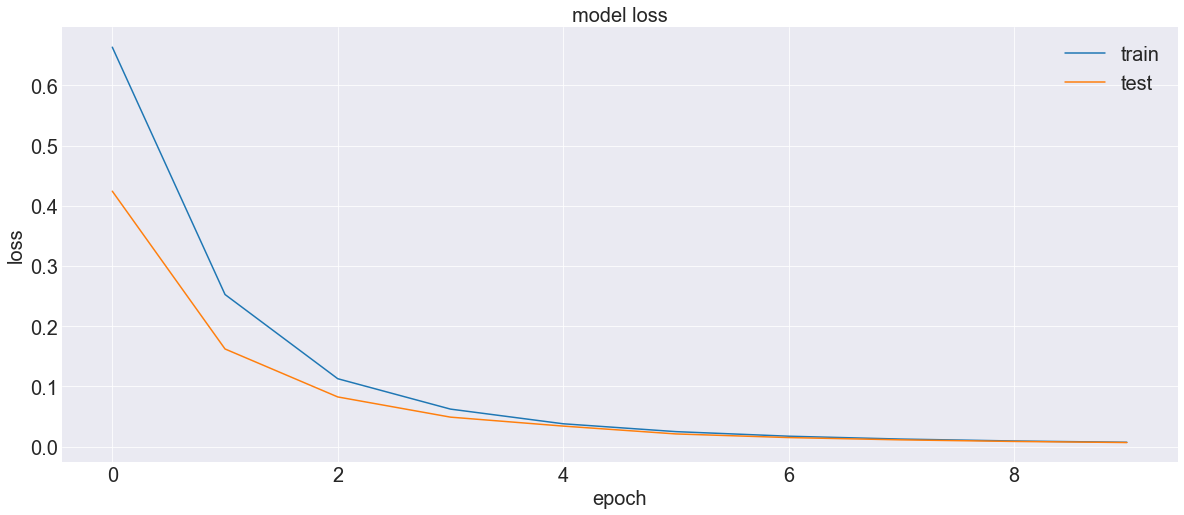

In [36]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()
